### Lineare Regression auf dem Ames Housing Price Data Set 

Einmalige Installation notwendiger Pakete wird in VL 3 beschrieben. Verwendet werden hier die Bibliotheken pandas, numpy, matplotlib, seaborn, sklearn, imblearn. Bitte einmalig installieren.

##### Versionsgeschichte

    1.0 05.05.2023 Willi Hahn Initialversion
          Datenvorbereitung nach https://www.eamonfleming.com/projects/housing-regression.html
    1.1 05.06.2023 Willi Hahn Bokeh Plot Truth vs Prediction angefügt
    1.2 16.06.2023 Willi Hahn interactive Bokeh Plots
    1.2 23.10.2023 Willi Hahn Datenvorbereitung neu strukturiert. 
                         Eingabedaten werden nun in Ames EDA handcrafted.ipynb erstellt.
   


In [1]:
# notwendige Bibliotheken importieren und konfigurieren
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
_ = pd.set_option('display.max_columns', None) # damit mehr als 20 Spalten angezeigt werden.
pd.set_option('display.min_rows', 8) # damit nicht nur 10 Zeilen mit  ... dazwischen ausgegeben werden
pd.set_option('display.max_rows', 500) # damit nicht nur 10 Zeilen mit  ... dazwischen ausgegeben werden
import numpy as np
from collections import Counter
from timeit import default_timer as timer
from math import ceil
from itertools import zip_longest
import matplotlib.pyplot as plt #Plot Bibliothek
import seaborn as sns #importing Seaborn (enhancement of Mathplotlib) for plots
from sklearn import metrics as met 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
import bokeh   # graphische, interaktive Plots
from bokeh.plotting import figure, output_notebook, show, ColumnDataSource
from bokeh.models import HoverTool, LassoSelectTool, Plot, WheelZoomTool, BoxZoomTool, ResetTool
output_notebook(resources=None, verbose=True, hide_banner=True)

scriptname='Ames LM V1.3.ipynb'
logtext=""
import logging
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)
logging.basicConfig(
    force=True,
    level=logging.INFO,
    format="%(asctime)s;%(levelname)s;%(message)s;",
    datefmt="%Y-%m-%d %H:%M:%S",
    encoding='utf-8',
    filemode='a',
    filename="AllScripts.log" # Default ist append
)
logger = logging.getLogger()


In [3]:
# Daten einlesen
path = 'c:/myBox/Projekte/FHDW/python/Ames_Train_1_cleaned.csv' # für lokale Dateien
#path = 'https://github.com/WilliHahn/FHDW/raw/main/Ames_Train_1_cleaned.csv'
df = pd.read_csv(path, sep=',') 

# Originaldaten einlesen für Unersuchungen der Vorhersagen
path = 'c:/myBox/Projekte/FHDW/Kurs DAML/Daten/AmesHousing.csv' # für lokale Dateien
#path = 'https://github.com/WilliHahn/FHDW/raw/main/AmesHousing.csv'
df_org= pd.read_csv(path, sep=',') 


In [4]:
# Trainings- und Testdaten aufteilen

TESTANTEIL = 0.25 # Split der Test- und Trainingsdaten
# Trennung von unabhängigen Variablen und abhängiger Zielvariable
y = df['SalePrice']
x = df.drop(['SalePrice'], axis = 1)
#x.head().T
#y.head().T
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=TESTANTEIL, random_state=4711)
dfx_test = pd.DataFrame(data=x_test, columns=x.columns) # Hilfe, um unskalierte Daten später in Bezug auf OrderNo zu zeigen
x_test.drop(columns=['Order'], inplace=True, axis=1) # jetzt erst eindeutigen Primärschlüssel entfernen
x_train.drop(columns=['Order'], inplace=True, axis=1) # jetzt erst eindeutigen Primärschlüssel entfernen
# und prüfen durch ansehen
#print (x_train.shape)
#print (y_train.shape)
#print (x_test.shape)
#print (y_test.shape)



In [5]:
# Datenvorbereitung : Variablen skalieren
SCALER = StandardScaler()
#SCALER = MinMaxScaler()

x_train = SCALER.fit_transform(x_train)
x_test = SCALER.transform(x_test)
#
#x_test.T

In [6]:
# Lineare Regression berechnen
t0 = timer()

regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

df_comparison = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

t1 = timer()
print ('Laufzeit Vorhersage = ', round(t1 - t0, 0), ' sec')

# EVALUATING MODEL METRICS
mae = mean_absolute_error(y_test, y_pred)
print("MAE =", mae)
mse = mean_squared_error(y_test,y_pred)
print("MSE",mse)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE",rmse)
r2 = r2_score(y_test,y_pred)
print('Model Score R2: ', r2)
adjusted_r2 = 1 - (1-r2)*(len(y_pred)-1)/(len(y_pred)-x_test.shape[1]-1)
print('Model Score R2 Adjusted: ', adjusted_r2)
#print('\n\nCoefficients: ', regressor.coef_)
#print('Intercept: ',regressor.intercept_)

logging.info(scriptname + ';' + " Standard scaled"+ "; Data Frame: "+str(df.shape[0])+ ";"+ str(df.shape[1])+ 
             "; Testanteil: "+ f'{TESTANTEIL:9.2f}'+ ";")
logging.info(scriptname + '; MAE=' + f'{mae:9.0f}' + "; RMSE=" + f'{rmse:9.0f}'+ "; R2=" + f'{r2:9.4f}'+ "; R2 adj.="+ 
             f'{adjusted_r2:9.4f}'+ ";")
zipped=zip(x.columns,regressor.coef_)
tmpString="Intercept="+f'{regressor.intercept_:4.3f}' +", "
while True:
    try:
        tup=next(zipped)
        tmpString=tmpString+tup[0] +"->" + f'{tup[1]:4.2f}'+", "
    except StopIteration:
        break
logging.info(scriptname + ';' +str(list(x.columns))+ ";")
logging.info(scriptname + ';' +tmpString+ ";")


LinearRegression()

Laufzeit Vorhersage =  0.0  sec
MAE = 20008.579436843727
MSE 780644133.7531071
RMSE 27940.00955177194
Model Score R2:  0.854722020733945
Model Score R2 Adjusted:  0.8486406169507148


In [7]:
# show log file on Colab
#!cat ./AllScripts.log

In [8]:
# Regressionskoeffizienten und 1-unit change
print('Intercept: ',regressor.intercept_)
var_impact = pd.DataFrame(data=[x.columns, regressor.coef_]).T
var_impact.columns = ["Variable", "1-unit change"]
var_impact

Intercept:  183827.43430837878


,Variable,1-unit change
0,Order,7152.88554
1,Bsmt Qual,13706.379752
2,Exter Qual,4829.959709
3,Fireplace Qu,3887.876866
4,Functional,9640.01667
5,Garage Area,-2658.906622
6,Garage Qual,27127.678458
7,Gr Liv Area,-7931.646129
8,HouseAge,1952.90418
9,TotalPorchSF,-4726.127119


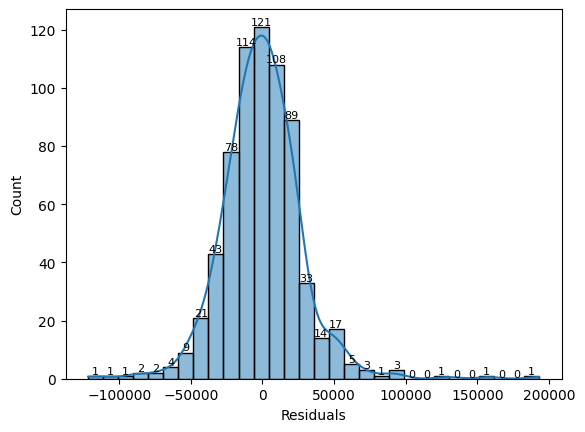

In [9]:
# Sind die die Residuen zwischen wirklichen und vorhergesagten Verkaufspreisen normalverteilt?
residuals = y_test - y_pred
y = sns.histplot(residuals, bins=30, stat='count', element="bars", kde=True)
_ = y.bar_label(y.containers[1], fontsize = 8)
_ = plt.xlabel('Residuals')
#plt.scatter(y=residuals, x=data['x'])
#plt.ylabel('Residuals')
#plt.xlabel('Independent variable x')
plt.show()
logging.info(scriptname + '; Residuals min,max, Skew, Curtosis;' + f'{residuals.min():9.0f}' + 
             ";" + f'{residuals.max():9.0f}'+ ";"  + f'{residuals.skew():2.4f}'+ ";"  + f'{residuals.kurtosis():2.4f}'+ ";" )


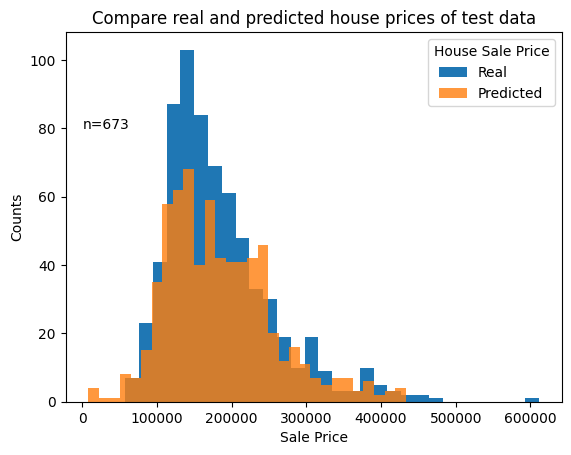

In [10]:
# Vergleich der Verteilungen für real und predicted house prices
fig, axes = plt.subplots(1)
plt.rcParams["figure.autolayout"] = True
_ = plt.hist(df_comparison['Actual'],bins=30)
_ = plt.xlabel('Sale Price');
_ = plt.text(1.8,80,"n=" + str (df_comparison.shape[0]),color='black')
_ = plt.hist(df_comparison['Predicted'],bins=30, alpha=.8)
_ = plt.xlabel('Sale Price');
_ = plt.ylabel('Counts');
_ = plt.title('Compare real and predicted house prices of test data');
_ = plt.legend(title='House Sale Price', loc='upper right', labels=['Real', 'Predicted'])

plt.show()


In [11]:
# Zeichne wahre Hauspreise gegen Vorhersagen, mit tool tips

output_notebook(resources=None, verbose=True, hide_banner=True)

df_tip=pd.concat([df_comparison,dfx_test], axis=1, join='inner') 
df_tip['Order'] = dfx_test['Order'].astype('int64')

source = ColumnDataSource(df_tip)

hover = HoverTool(
        tooltips=[
            ("OrderNo", "@Order")
             , ("Sale Price Actual", "@Actual{0}")
             , ("Sale Price Predicted", "@Predicted{0}")
             , ("House Age", "@HouseAge{0}")
             , ("Remodel Age", "@RemodelAge{0}")
             , ("Lot Area", "@{Lot Area}{0}")
             , ("Living Area", "@{Gr Liv Area}{0}")
             , ("Bathrooms", "@TotalBathrooms{0.0}")
             , ("NeighborhoodClass", "@NeighborhoodClass")
        ]
    )

p = figure(width=800, height=400, tools=[hover],
           title="Actual vs predicted Sale Price (see tool tip)", x_range=(0, 700000), 
               y_range=(0, 700000),
           toolbar_location="right", toolbar_sticky=False)
p.add_tools(WheelZoomTool(), BoxZoomTool(), ResetTool())
p.xaxis.axis_label = 'Actual Sale Price'
p.yaxis.axis_label = 'Predicted Sale Price'
p.left[0].formatter.use_scientific = False
p.below[0].formatter.use_scientific = False
_ = p.circle('Actual', 'Predicted', size=10, source=source)
_ = show(p)